1. Bestimmung der Tonhöhe eines akustischen Signals
Klangquellen:
• Musikinstrument (Mundharmonika)
Messaufgaben:
• Laden Sie die Konfiguration Versuch_3_Ton.pssettings in der Software PicoScope.
Bei dieser Konfiguration wird davon ausgegangen, dass das Mikrofon an Kanal A
angeschlossen ist.
• Erzeugen Sie einen konstanten Ton. Achten Sie darauf, dass das Signal eine genügend
hohe Amplitude hat und die Perioden sich gleichmäßig wiederholen. Stoppen Sie die
Messung und speichern die Daten als CSV-Datei ab.
• Stellen Sie mehrere Perioden des Signals graphisch dar. Bestimmen Sie anhand des
Plots die Grundperiode (in ms) und die Grundfrequenz (in Hz) des Signals. Wie
groß sind Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der
Abtastzeitpunkte) und Abtastintervall t (in s)?
• Berechnen Sie mithilfe der Funktion numpy.fft.fft() die Fouriertransformierte des
Signals. Bestimmen Sie daraus das Amplitudenspektrum und stellen es ebenfalls
graphisch dar. Achtung: die Frequenzachse des numerisch berechneten Spektrums ist
nicht in der Einheit Hertz angegeben, sondern in der Einheit Anzahl Schwingungen
innerhalb der gesamten Signaldauer, d.h. der n-te Eintrag im Spektrum f[n] entspricht
n Schwingungen innerhalb der Gesamtlänge des Signals von M · t s. Die zugehörige
Frequenz f in Hertz berechnet sich folglich aus
f = n/M · t
.
Stellen Sie mithilfe dieser Umrechnung das Amplitudenspektrum in Hertz dar.
• Identifizieren Sie die Grundfrequenz im Spektrum und berechnen Sie aus der gefundenen
Wellenzahl die Frequenz in Hz. Welche Amplitude hat diese Fourierkomponente?

In [122]:
import numpy as np
import matplotlib.pyplot as plt
def conv(x):
    return x.replace(',', '.').encode()


ton = np.genfromtxt((conv(x) for x in open('.\\Töne\\ton1.csv')),
                     delimiter=';', skip_header=3, usecols=())

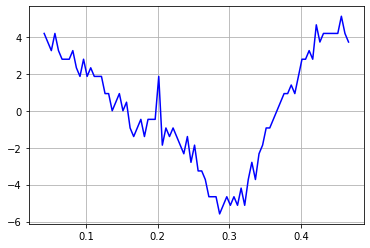

In [123]:
plt.plot(ton[5010:5096:,0], ton[5010:5096:,1], 'b')
plt.grid(True)

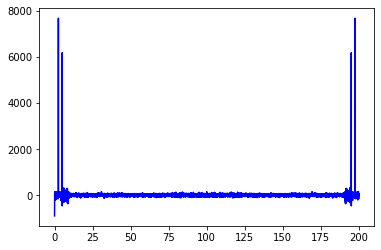

In [124]:
Signaldauer = np.abs(np.max(ton[:,0])) + np.abs(np.min(ton[:,0]))
M = len(ton[:,0])
delta_t = ton[1,0] - ton[0,0]
Abtastfrequenz = M / Signaldauer
fft = np.fft.fft(ton[:,1])
plt.plot(range(len(fft))/(M*delta_t), np.real(fft), 'b');

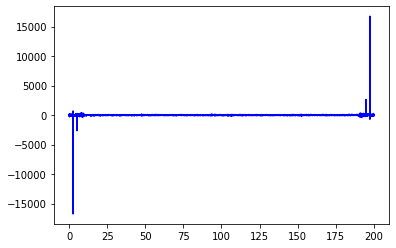

In [125]:
plt.plot(range(len(fft))/(M*delta_t), np.imag(fft), 'b');

In [126]:
ck = np.max(fft)
Grundfrequenz = np.argmax(fft) / (M * delta_t)
Ak = np.real(ck + np.conjugate(ck))
ak = Ak/2
Bk = np.real((ck - np.conjugate(ck))*1j)
bk = Bk / 2
print(f"Grundfrequenz: {Grundfrequenz}hz")
print(f"Amplitude d. Grundfrequenz: {ck}")
print(f"Ak: {Ak}")
print(f"Bk : {Bk}")

Grundfrequenz: 2.518992403039286hz
Amplitude d. Grundfrequenz: (7672.693931210911-16756.401170653444j)
Ak: 15345.387862421821
Bk : 33512.80234130689
